# Logistic Regression Ajusted
We are gonna test wish one is better, the ajusted or the normal logistic regresion

## Imports

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression
from Matrix import convert_matrix
from sklearn.model_selection import train_test_split

## Get the data

In [2]:
table = convert_matrix(with_pearson=252,len_words=(3,3))
survived = table.index.labels[1].tolist()
patients = table.values
patients_train, patients_test,survived_train, survived_test = train_test_split(patients, 
                                                                               survived,test_size=0.2, random_state=42)


(575, 252)


## Normal Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(patients_train, survived_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Ajusted Logistic Regression

In [4]:
ajustedmodel = ajustLogisticRegression(patients_train,survived_train,patients_test,survived_test)['model']

[[13 20]
 [16 66]]


## 1 lest check the accurracy

In [5]:
from sklearn.metrics import accuracy_score

acurracy = accuracy_score(survived_test, model.predict(patients_test))
acurracyAjust = accuracy_score(survived_test, ajustedmodel.predict(patients_test))
print("normal",acurracy,"ajusted",acurracyAjust)

normal 0.64347826087 ajusted 0.686956521739


## 2 the ROC_AUC

In [6]:
from sklearn.metrics import roc_auc_score
print("normal")
probaNormal = model.predict_proba(patients_test)[:, 1]
roc_auc_normal = roc_auc_score(survived_test, probaNormal)
print(roc_auc_normal)
print("ajusted")
probaAjusted = ajustedmodel.predict_proba(patients_test)[:, 1]
roc_auc_ajusted = roc_auc_score(survived_test, probaAjusted)
print(roc_auc_ajusted)

normal
0.60236511456
ajusted
0.637472283814


# Confusiom Matrix

In [7]:
from sklearn.metrics import confusion_matrix
print("normal")
confusion_normal = confusion_matrix(survived_test,model.predict(patients_test))
print(confusion_normal)
print("ajusted")
confusion_ajusted = confusion_matrix(survived_test,ajustedmodel.predict(patients_test))
print(confusion_ajusted)

normal
[[ 6 27]
 [14 68]]
ajusted
[[13 20]
 [16 66]]


## ROC_AUC

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [18]:
def roc_curveplot(name,y_true,y_score,logit_roc_auc,acurracy):
    fpr, tpr, thresholds = roc_curve(y_true,y_score)
    plt.plot(fpr,tpr,label=str(name)+' AUC =%.2f' % logit_roc_auc+' acc ={:.2f}%'.format(acurracy*100)  )

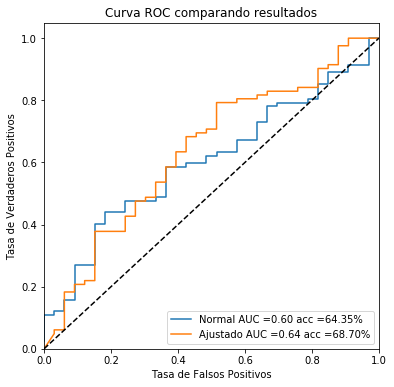

In [20]:
fig_size = [6, 6]
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
roc_curveplot('Normal',survived_test,probaNormal,roc_auc_normal,acurracy)
roc_curveplot('Ajustado',survived_test,probaAjusted,roc_auc_ajusted,acurracyAjust)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC comparando resultados')
plt.legend(loc="lower right")
plt.show()